# Практическое задание к уроку 2. Keras

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.


2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.

   Фиксируйте для тренировочного и тестового набора метрики accuracy.


3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 


4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [9]:
!pip install mnist

In [10]:
!pip install keras

In [14]:
import numpy as np
import mnist

#import tf.kears as keras
import keras
from keras.datasets import mnist, boston_housing, fashion_mnist  # наборы для работы

from keras.models import Sequential
from keras.layers import Dense
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# import tensorflow as tf

import matplotlib.pyplot as plt

In [15]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

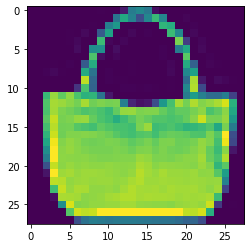

In [20]:
plt.imshow(train_images[100,:,:])
plt.show()

In [21]:
print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


In [22]:
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [23]:
model = Sequential([
  Dense(256, activation='relu', input_shape=(784,)), # входной слой + полносвязный слой из 256 нейронов с активацией ReLU
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(10, activation='softmax'),
])

model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy','AUC'],
)

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10, # эпохи
  batch_size=32,
)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5032 - accuracy: 0.8166 - auc: 0.9846
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3772 - accuracy: 0.8613 - auc: 0.9907
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3397 - accuracy: 0.8736 - auc: 0.9924
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3146 - accuracy: 0.8828 - auc: 0.9934
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2968 - accuracy: 0.8894 - auc: 0.9940
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2849 - accuracy: 0.8933 - auc: 0.9943
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2735 - accuracy: 0.9002 - auc: 0.9947
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2585 - accuracy: 0.9035 - auc: 0.9953
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - lo

In [24]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

model.save_weights('model.h5')

313/313 [==============================] - 51s 2ms/step - loss: 0.3357 - accuracy: 0.8844 - auc: 0.9912


In [25]:
y_predi = model(test_images[:,:])
np.argmax(y_predi, axis=1)

array([9, 2, 1, ..., 8, 1, 5])

In [26]:
yy = np.argmax(y_predi, axis=1)
np.where(test_labels != yy)[0]

array([  17,   21,   23, ..., 9972, 9977, 9979])

In [27]:
CM = confusion_matrix(test_labels,yy)
print(CM)

[[897   2   8  23   3   1  60   0   6   0]
 [  6 965   2  21   4   0   1   0   1   0]
 [ 34   1 788  17 111   1  45   0   3   0]
 [ 30   4   6 908  34   0  15   0   3   0]
 [  2   0  62  34 850   0  46   0   6   0]
 [  0   0   0   1   0 918   0  62   1  18]
 [172   1  87  30  73   0 629   0   8   0]
 [  0   0   0   0   0   5   0 965   0  30]
 [  9   0   3   7   3   2   4   5 967   0]
 [  1   0   0   0   0   6   0  36   0 957]]


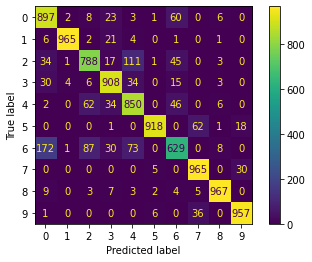

In [30]:
# ConfusionMatrixDisplay.from_estimator(model.h5,y_predi)
# plt.show()

disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=np.arange(10))

disp.plot( values_format ='.3g')
plt.show()

**Выводы:**

1. Большая точность достигается в эксперементах со слоями и эпохами.

2. Точность меняется от перезапуска модели из-за изменения случайных весов и локального минимума модели при обучении.

3. Из документации:

- при помощи tf.keras.callbacks расширяется поведение модели.

- возможно определение своих функций потерь и метрики.

- наличие возможности задавать веса и смещения.